# Data Libraries

In [2]:
# importing general libraries
import numpy as np 
import pandas as pd 

#importing deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#data augmentation of CNN
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Importing the Data

In [3]:
#connecting to google drive where the data is stored.
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) #ounting it to same google 

Mounted at /content/gdrive/


In [4]:
!wget '/content/gdrive/MyDrive/lung_cancer.zip'  #storing it in a folder named 'content'


/content/gdrive/MyDrive/lung_cancer.zip: Scheme missing.


In [5]:
!unzip '/content/gdrive/MyDrive/lung_cancer.zip' -d '/content/image_class/' #unzip all the images under a same folder


Streaming output truncated to the last 5000 lines.
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: /conte

In [6]:
image_set =  "/content/image_class/lung_image_sets" #defining the folder

# Data Augmentation

In [7]:
#Data augmentation
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2,rescale=1/255)

train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [8]:
image_shape = [224, 224,3] #define image shape

In [9]:
#libraries required for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [23]:
model = Sequential() #initiate a sequence

#1st CNN layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) #normalize batches
 
#2nd CNN layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) #normalize batches

#3rd CNN layer
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) #normalize batches

#4th CNN layer
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) #normalize batches
model.add(Dropout(0.1)) #prevent overfitting

#5th CNN layer
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) #normalize batches
model.add(Dropout(0.1)) #prevent overfitting

#flatten layer
model.add(Flatten())

#create FC layer
model.add(Dense(128))
model.add(Activation('relu'))

#2nd FC layer
model.add(Dense(64))
model.add(Activation('relu'))

#3rd FC layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Last layer
model.add(Dense(3))
model.add(Activation('softmax'))


In [24]:
model.summary() #summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [26]:
#compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
#fitting the model
history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 10, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
94/94 [==============================] - 115s 1s/step - loss: 1.1959 - accuracy: 0.4747 - val_loss: 2.6322 - val_accuracy: 0.3333
Epoch 2/10
94/94 [==============================] - 112s 1s/step - loss: 0.7801 - accuracy: 0.6553 - val_loss: 2.7550 - val_accuracy: 0.2270
Epoch 3/10
94/94 [==============================] - 112s 1s/step - loss: 0.4614 - accuracy: 0.8018 - val_loss: 0.5534 - val_accuracy: 0.7647
Epoch 4/10
94/94 [==============================] - 112s 1s/step - loss: 0.3825 - accuracy: 0.8458 - val_loss: 1.9221 - val_accuracy: 0.3260
Epoch 5/10
94/94 [==============================] - 112s 1s/step - loss: 0.2932 - accuracy: 0.8917 - val_loss: 1.2269 - val_accuracy: 0.5227
Epoch 6/10
94/94 [==============================] - 113s 1s/step - loss: 0.3027 - accuracy: 0.8898 - val_loss: 1.1059 - val_accuracy: 0.5820
Epoch 7/10
94/94 [==============================] - 110s 1s/step - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.9699 - val_accuracy: 0.6600
Epoch 8/10
94

# Model Evaluation

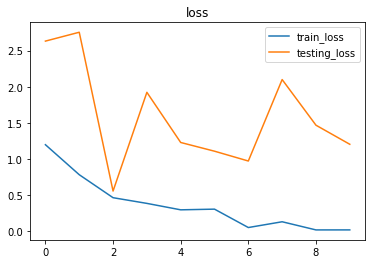

In [28]:
# plotting the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

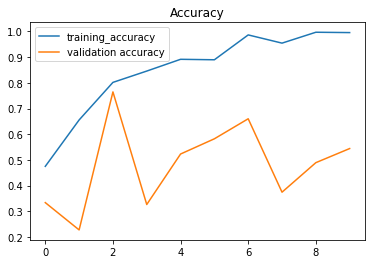

In [29]:
#plotting accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [30]:
#Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [31]:
Y_pred = model.predict_generator(validate_set) #making a predictions
y_pred = np.argmax(Y_pred ,axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [32]:
target_names = ['aca','n', 'scc'] #setting the target names


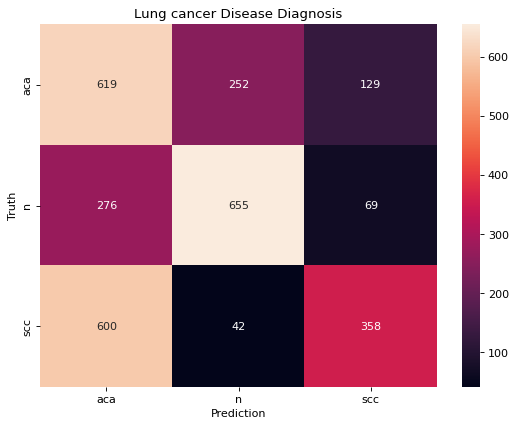

In [33]:
import seaborn as sns
#defining the matrix
conf_arr = confusion_matrix(validate_set.classes, y_pred)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#visualize the matrix

ax = sns.heatmap(conf_arr, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names) 

plt.title('Lung cancer Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [34]:
#classification report
print('Classification Report')
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

         aca       0.41      0.62      0.50      1000
           n       0.69      0.66      0.67      1000
         scc       0.64      0.36      0.46      1000

    accuracy                           0.54      3000
   macro avg       0.58      0.54      0.54      3000
weighted avg       0.58      0.54      0.54      3000



In [20]:

#evaluate on test data
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

24/24 [==============================] - 23s 961ms/step - loss: 3.3191 - accuracy: 0.3720
test_loss, test accuracy [3.3190603256225586, 0.3720000088214874]
